In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product

centers = np.array([[1, 0], [0, 1]])
harmonies = np.array([1.0, 1.])
gamma = 0.25
ndim = centers.shape[1]
D = 0.25  # Small noise
maxsteps = 500
tau = 0.01  # time step size
xinit = np.array([0, 0.])  # starting at the midpoint between the two attractors


# Defining functions
def phi(x, center, gamma):
    """RBF centers"""
    l2norm = np.linalg.norm(x - center)
    return np.exp(-l2norm**2 / gamma)


def calc_harmony(x, centers, harmonies, gamma):
    """Calculate the harmony at a given position"""
    harmony = 0
    for c in range(centers.shape[0]):
        harmony += harmonies[c] * phi(x, centers[c], gamma)
    return harmony


def step_dyn(x, centers, harmonies, gamma):
    """Iterate the discretized dynamics"""
    dx = np.zeros(x.shape)
    mult = -2./gamma
    for c in range(centers.shape[0]):
        dx += (mult * harmonies[c]
               * (x - centers[c]) * phi(x, centers[c], gamma))
    return dx


def not_close(x, centers, tol):
    """Returns True if not close to one of the centers"""
    l2norm = np.zeros(centers.shape[0])
    for c in range(centers.shape[0]):
        diff = x - centers[c]
        l2norm[c] = np.sqrt(np.dot(diff, diff))
    if np.any(l2norm < tol):
        return False
    else:
        return True

from mpl_toolkits.mplot3d import Axes3D

gamma=0.2
cs = np.array([[1, 0,], [0, 1.]])
hs = np.array([1., 0.5])
delta = 0.01
x1 = np.arange(-0.5, 1.5, delta)
x2 = np.arange(-0.5, 1.5, delta)
XX, YY = np.meshgrid(x1, x1)
Z = np.zeros((len(x1), len(x2)))
for i, j in product(range(len(x1)), range(len(x2))):
        Z[i, j] = calc_harmony([x1[i], x2[j]], cs, hs, gamma)

# making a trajectory that climbs the harmony surface
xhist = np.zeros((maxsteps, ndim))
xhist[0,:] = [0, 0.]
D = 0.001
t = 0

while t < maxsteps-1:
    xhist[t+1,] = xhist[t,] + tau*step_dyn(xhist[t,], cs, hs, gamma) + np.sqrt(2*D*tau)*np.random.normal(0, 1)
    t += 1
traj = xhist[~np.all(xhist == 0, axis=1)]
currharm = np.zeros(traj.shape[0])
for i in range(len(currharm)):
    currharm[i] = calc_harmony(traj[i,:], cs, hs, gamma)

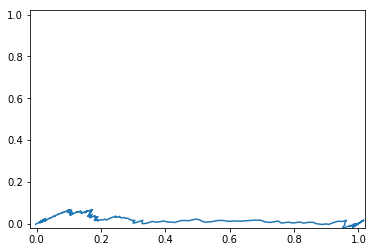

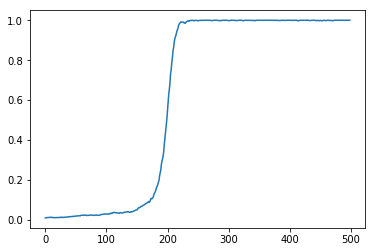

In [2]:
plt.plot(traj[:,0], traj[:,1])
plt.ylim(-0.02, 1.02)
plt.xlim(-0.02, 1.02)
plt.show()

plt.plot(currharm)
plt.show()

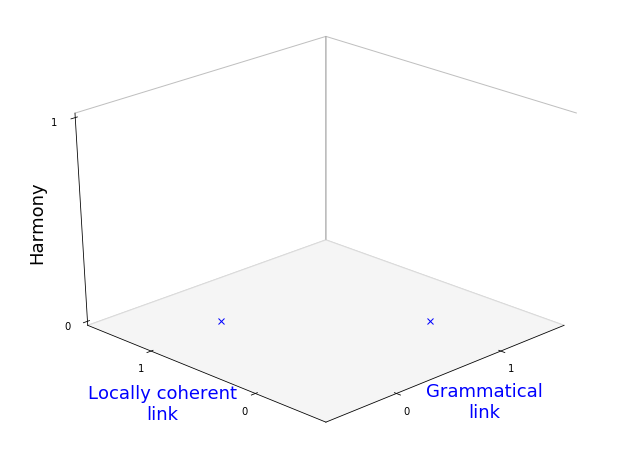

In [3]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(11)
ax = fig.gca(projection='3d')
ax.grid(False)
#ax.plot_surface(XX, YY, Z, cmap='binary', alpha=0.95)#'coolwarm_r')
#ax.plot3D(traj[0:tstop-1,0], traj[0:tstop-1,1], currharm[0:tstop-1], 'r-')
#ax.plot3D(traj[tstop+1:,0], traj[tstop+1:,1], currharm[tstop+1:], 'r-')
#ax.plot([0.4], [1.], [0.4], 'ro')
#ax.quiver(0, 0, 1., 0.4, 1.0, -0.6, edgecolor='r', length=0.94, arrow_length_ratio=0.1)

# making it look good
ax.view_init(elev=30., azim=-135) #-55
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 1])
ax.xaxis.pane.set_edgecolor('gray')
ax.yaxis.pane.set_edgecolor('gray')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
#ax.zaxis.pane.fill = False
ax.plot([1, 0], [0, 1], 'bx')
ax.set_zlim(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Harmony', rotation=90, size=18)
ax.text(1.25, -0.3, -0.5, 'Grammatical\nlink', size=18, color='b', horizontalalignment='center')
ax.text(-0.35, 1.25, -0.5, 'Locally coherent\nlink', size=18, color='b', horizontalalignment='center')
ax.plot_surface(XX.T, YY.T, Z, cmap='binary', alpha=0.)
plt.show()
fig.savefig('Fig1StructsAsPts.pdf', bbox_inches='tight')

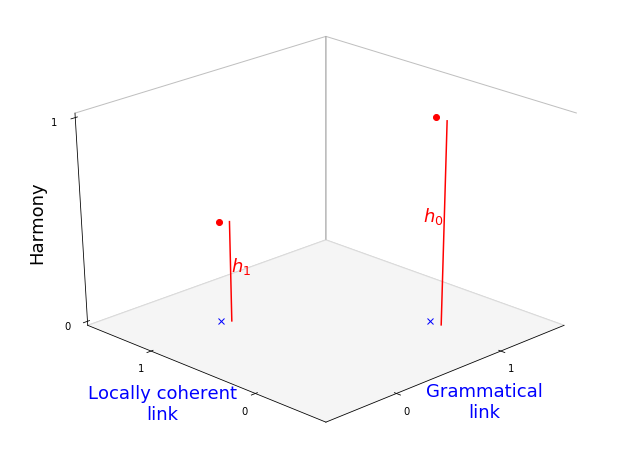

In [4]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(11)
ax = fig.gca(projection='3d')
ax.grid(False)
#ax.plot3D(traj[0:tstop-1,0], traj[0:tstop-1,1], currharm[0:tstop-1], 'r-')
#ax.plot3D(traj[tstop+1:,0], traj[tstop+1:,1], currharm[tstop+1:], 'r-')
#ax.plot([0.4], [1.], [0.4], 'ro')
#ax.quiver(0, 0, 1., 0.4, 1.0, -0.6, edgecolor='r', length=0.94, arrow_length_ratio=0.1)

# making it look good
ax.view_init(elev=30., azim=-135) #-55
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 1])
ax.xaxis.pane.set_edgecolor('gray')
ax.yaxis.pane.set_edgecolor('gray')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
#ax.zaxis.pane.fill = False
ax.plot([1, 0], [0, 1], 'bx')
ax.plot([1, 0], [0, 1], [1., 0.5], 'ro')
ax.set_zlim(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Harmony', rotation=90, size=18)
ax.text(1.25, -0.3, -0.5, 'Grammatical\nlink', size=18, color='b', horizontalalignment='center')
ax.text(-0.35, 1.25, -0.5, 'Locally coherent\nlink', size=18, color='b', horizontalalignment='center')
ax.plot([1., 1.], [-0.1, -0.1], 'r', zs=[0, 1])
ax.text(1, 0, 0.5, '$h_0$', size=18, color='r', horizontalalignment='center')
ax.plot([0.05, 0.05], [0.95, 0.95], 'r', zs=[0, 0.5])
ax.text(0.1, 0.9, 0.25, '$h_1$', size=18, color='r', horizontalalignment='center')
ax.plot_surface(XX.T, YY.T, Z, cmap='binary', alpha=0.)
plt.show()
fig.savefig('Fig2LocalHarmonies.pdf', bbox_inches='tight')

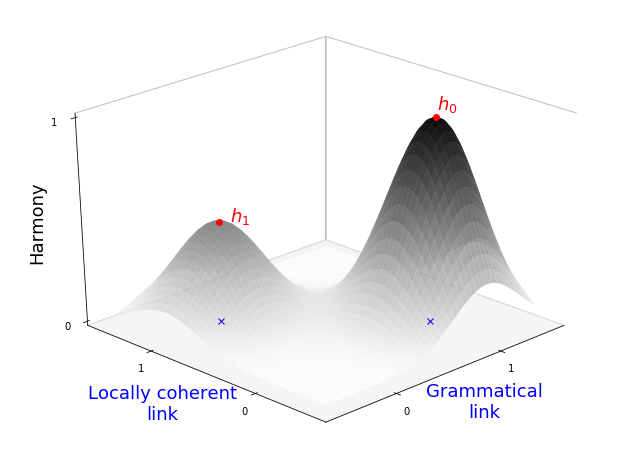

In [5]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(11)
ax = fig.gca(projection='3d')
ax.grid(False)
#ax.plot3D(traj[0:tstop-1,0], traj[0:tstop-1,1], currharm[0:tstop-1], 'r-')
#ax.plot3D(traj[tstop+1:,0], traj[tstop+1:,1], currharm[tstop+1:], 'r-')
#ax.plot([0.4], [1.], [0.4], 'ro')
#ax.quiver(0, 0, 1., 0.4, 1.0, -0.6, edgecolor='r', length=0.94, arrow_length_ratio=0.1)

# making it look good
ax.view_init(elev=30., azim=-135) #-55
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 1])
ax.xaxis.pane.set_edgecolor('gray')
ax.yaxis.pane.set_edgecolor('gray')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
#ax.zaxis.pane.fill = False
ax.plot([1, 0], [0, 1], 'bx')
ax.plot([1, 0], [0, 1], [1., 0.5], 'ro')
ax.set_zlim(0, 1)
#ax.set_xlim(0.5, 1.5)
#ax.set_ylim(0.5, 1.5)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Harmony', rotation=90, size=18)
ax.text(1.25, -0.3, -0.5, 'Grammatical\nlink', size=18, color='b', horizontalalignment='center')
ax.text(-0.35, 1.25, -0.5, 'Locally coherent\nlink', size=18, color='b', horizontalalignment='center')
#ax.plot([1., 1.], [-0.1, -0.1], 'r', zs=[0, 1])
ax.text(1, -0.1, 1.05, '$h_0$', size=18, color='r', horizontalalignment='center')
#ax.plot([0.05, 0.05], [0.95, 0.95], 'r', zs=[0, 0.5])
ax.text(0.1, 0.9, 0.5, '$h_1$', size=18, color='r', horizontalalignment='center')
ax.plot_surface(XX.T, YY.T, Z, cmap='binary', alpha=0.8)
plt.show()
fig.savefig('Fig3HarmonySurface.pdf', bbox_inches='tight')

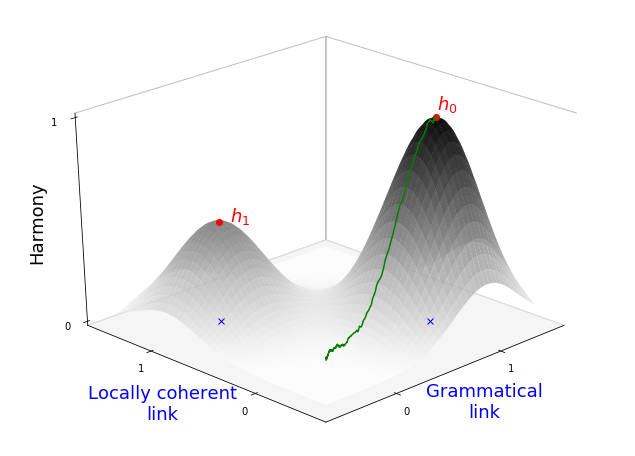

In [6]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(11)
ax = fig.gca(projection='3d')
ax.grid(False)

# making it look good
ax.view_init(elev=30., azim=-135) #-55
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 1])
ax.xaxis.pane.set_edgecolor('gray')
ax.yaxis.pane.set_edgecolor('gray')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
#ax.zaxis.pane.fill = False
ax.plot([1, 0], [0, 1], 'bx')
ax.plot([1, 0], [0, 1], [1., 0.5], 'ro')
ax.set_zlim(0, 1)
#ax.set_xlim(0.5, 1.5)
#ax.set_ylim(0.5, 1.5)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Harmony', rotation=90, size=18)
ax.text(1.25, -0.3, -0.5, 'Grammatical\nlink', size=18, color='b', horizontalalignment='center')
ax.text(-0.35, 1.25, -0.5, 'Locally coherent\nlink', size=18, color='b', horizontalalignment='center')
#ax.plot([1., 1.], [-0.1, -0.1], 'r', zs=[0, 1])
ax.text(1, -0.1, 1.05, '$h_0$', size=18, color='r', horizontalalignment='center')
#ax.plot([0.05, 0.05], [0.95, 0.95], 'r', zs=[0, 0.5])
ax.text(0.1, 0.9, 0.5, '$h_1$', size=18, color='r', horizontalalignment='center')
ax.plot_surface(XX.T, YY.T, Z, cmap='binary', alpha=0.8)
ax.plot3D(traj[:,0], traj[:,1], currharm, 'g-')
plt.show()
fig.savefig('Fig4Traj.pdf', bbox_inches='tight')